In [58]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('paper',font_scale=2.0)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Data Read

In [3]:
movies=pd.read_csv("../../data/movie/movies.csv")
ratings = pd.read_csv("../../data/movie/ratings.csv")
tags = pd.read_csv("../../data/movie/tags.csv")
links = pd.read_csv("../../data/movie/links.csv")

## Data Info

In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## Data Cleansing

### 1) movies 개봉연도 데이터 정제

In [8]:
movies['year']=movies['title'].str.extract('(\(\d\d\d\d\))')

In [9]:
movies['year']=movies['year'].str.extract('(\d\d\d\d)')
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [10]:
movies['year'].unique()

array(['1995', '1994', '1996', '1976', '1992', '1967', '1993', '1964',
       '1977', '1965', '1982', '1990', '1991', '1989', '1937', '1940',
       '1969', '1981', '1973', '1970', '1955', '1959', '1968', '1988',
       '1997', '1972', '1943', '1952', '1951', '1957', '1961', '1958',
       '1954', '1934', '1944', '1960', '1963', '1942', '1941', '1953',
       '1939', '1950', '1946', '1945', '1938', '1947', '1935', '1936',
       '1956', '1949', '1932', '1975', '1974', '1971', '1979', '1987',
       '1986', '1980', '1978', '1985', '1966', '1962', '1983', '1984',
       '1948', '1933', '1931', '1922', '1998', '1929', '1930', '1927',
       '1928', '1999', '2000', '1926', '1919', '1921', '1925', '1923',
       '2001', '2002', '2003', '1920', '1915', '1924', '2004', '1916',
       '1917', '2005', '2006', '1902', nan, '1903', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '1908'], dtype=object)

### 결측 값 확인

In [11]:
movies[movies['year'].isnull()]

,movieId,title,genres,year
6059,40697,Babylon 5,Sci-Fi,NaN
9031,140956,Ready Player One,Action|Sci-Fi|Thriller,NaN
9091,143410,Hyena Road,(no genres listed),NaN
9138,147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
9179,149334,Nocturnal Animals,Drama|Thriller,NaN
9259,156605,Paterson,(no genres listed),NaN
9367,162414,Moonlight,Drama,NaN
9448,167570,The OA,(no genres listed),NaN
9514,171495,Cosmos,(no genres listed),NaN
9515,171631,Maria Bamford: Old Baby,(no genres listed),NaN


In [12]:
movies['year'].fillna('2050',inplace=True)

In [13]:
movies[movies['year'].isnull()]

,movieId,title,genres,year


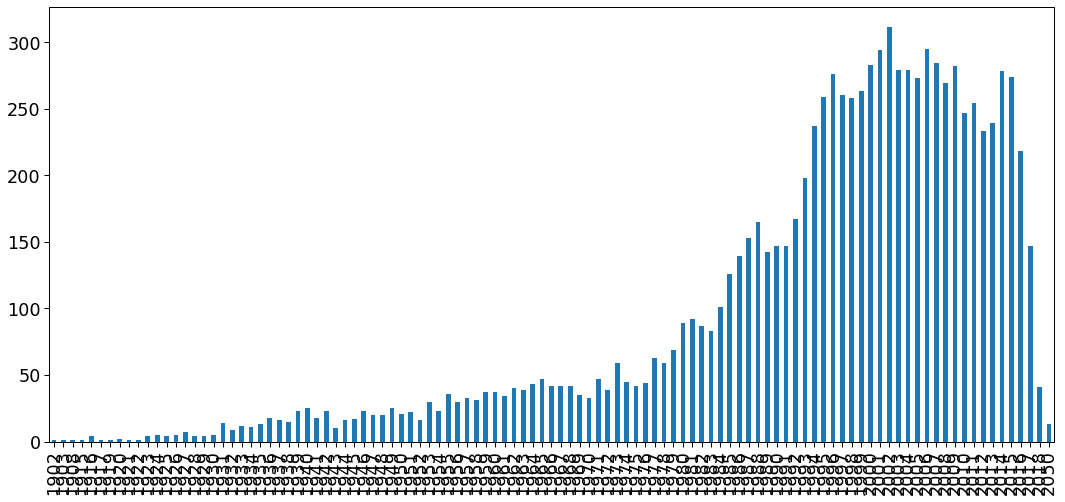

In [14]:
movies['year'].value_counts().sort_index().plot.bar(figsize=(18,8))

In [15]:
movies['year'].value_counts().sort_values(ascending=False).head(20)

2002    311
2006    295
2001    294
2007    284
2000    283
2009    282
2004    279
2003    279
2014    278
1996    276
2015    274
2005    273
2008    269
1999    263
1997    260
1995    259
1998    258
2011    254
2010    247
2013    239
Name: year, dtype: int64

## 개봉연도 시각화

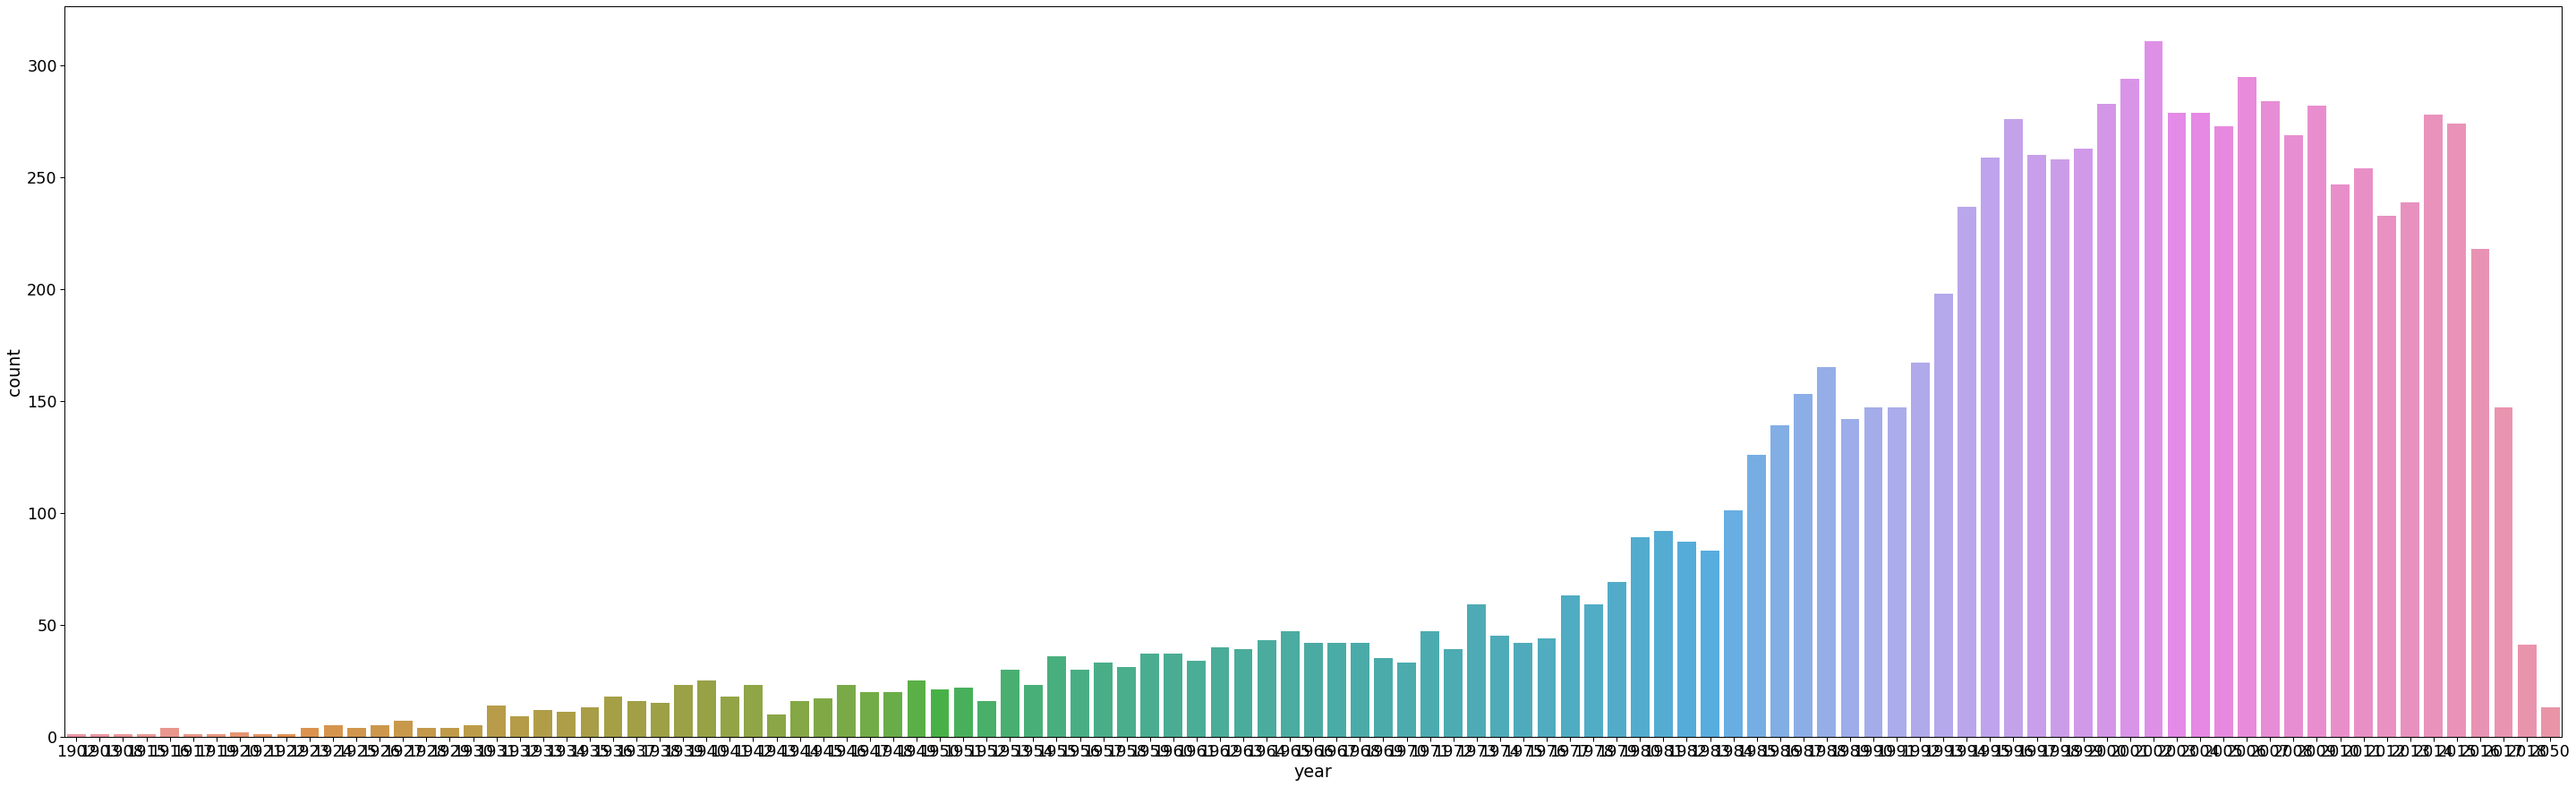

In [16]:
plt.figure(figsize=(50,15))
sns.countplot(data=movies,x='year')

## genres 분석

In [17]:
genres_list=list(movies['genres'].apply(lambda x: x.split('|')))
genres_list

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Comedy'],
 ['Comedy'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Action', 'Crime', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Children', 'Drama'],
 ['Drama', 'Romance'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Crime', 'Drama'],
 ['Drama'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Children', 'Drama'],
 ['Crime', 'Drama'],
 ['Children', 'Comedy'],
 

In [18]:
flat_list = []
for sublist in genres_list:
    for item in sublist:
        flat_list.append(item)
flat_list

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Adventure',
 'Children',
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 'Children',
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Adventure',
 'Animation',
 'Children',
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Crime',
 'Drama',
 'Drama',
 'Romance',
 'Comedy',
 'Comedy',
 'Action',
 'Comedy',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Crime',
 'Thriller',
 'Crime',
 'Drama',
 'Horror',
 'Mystery',
 'Thriller',
 'Action',
 'Crime',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Children',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Drama',
 'Fantasy',
 'Mystery',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Thriller',
 'Children',
 'Drama',
 'Crime',
 'Drama',
 'Children',
 'Comedy',
 'Comedy',
 'Romance'

In [19]:
genres_unique=list(set(flat_list))

In [20]:
genres_unique

['Western',
 'Children',
 'Horror',
 'Adventure',
 'Musical',
 'Fantasy',
 'Film-Noir',
 'Comedy',
 'Drama',
 'Thriller',
 'IMAX',
 'Romance',
 'Animation',
 'Sci-Fi',
 'Documentary',
 'Crime',
 'Mystery',
 'War',
 'Action',
 '(no genres listed)']

## 장르 데이터 숫자형으로 변환하기

In [21]:
for i in genres_unique:
    movies[f'{i}']=movies['genres'].apply(lambda x: f'{i}' in x)
    

In [22]:
movies

,movieId,title,genres,year,Western,Children,Horror,Adventure,Musical,Fantasy,...,IMAX,Romance,Animation,Sci-Fi,Documentary,Crime,Mystery,War,Action,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,False,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,1995,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
9739,193585,Flint (2017),Drama,2017,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [23]:
genres_dummies=movies['genres'].str.get_dummies(sep='|')
genres_dummies.to_pickle('../../data/movie/genres_dummies.p')

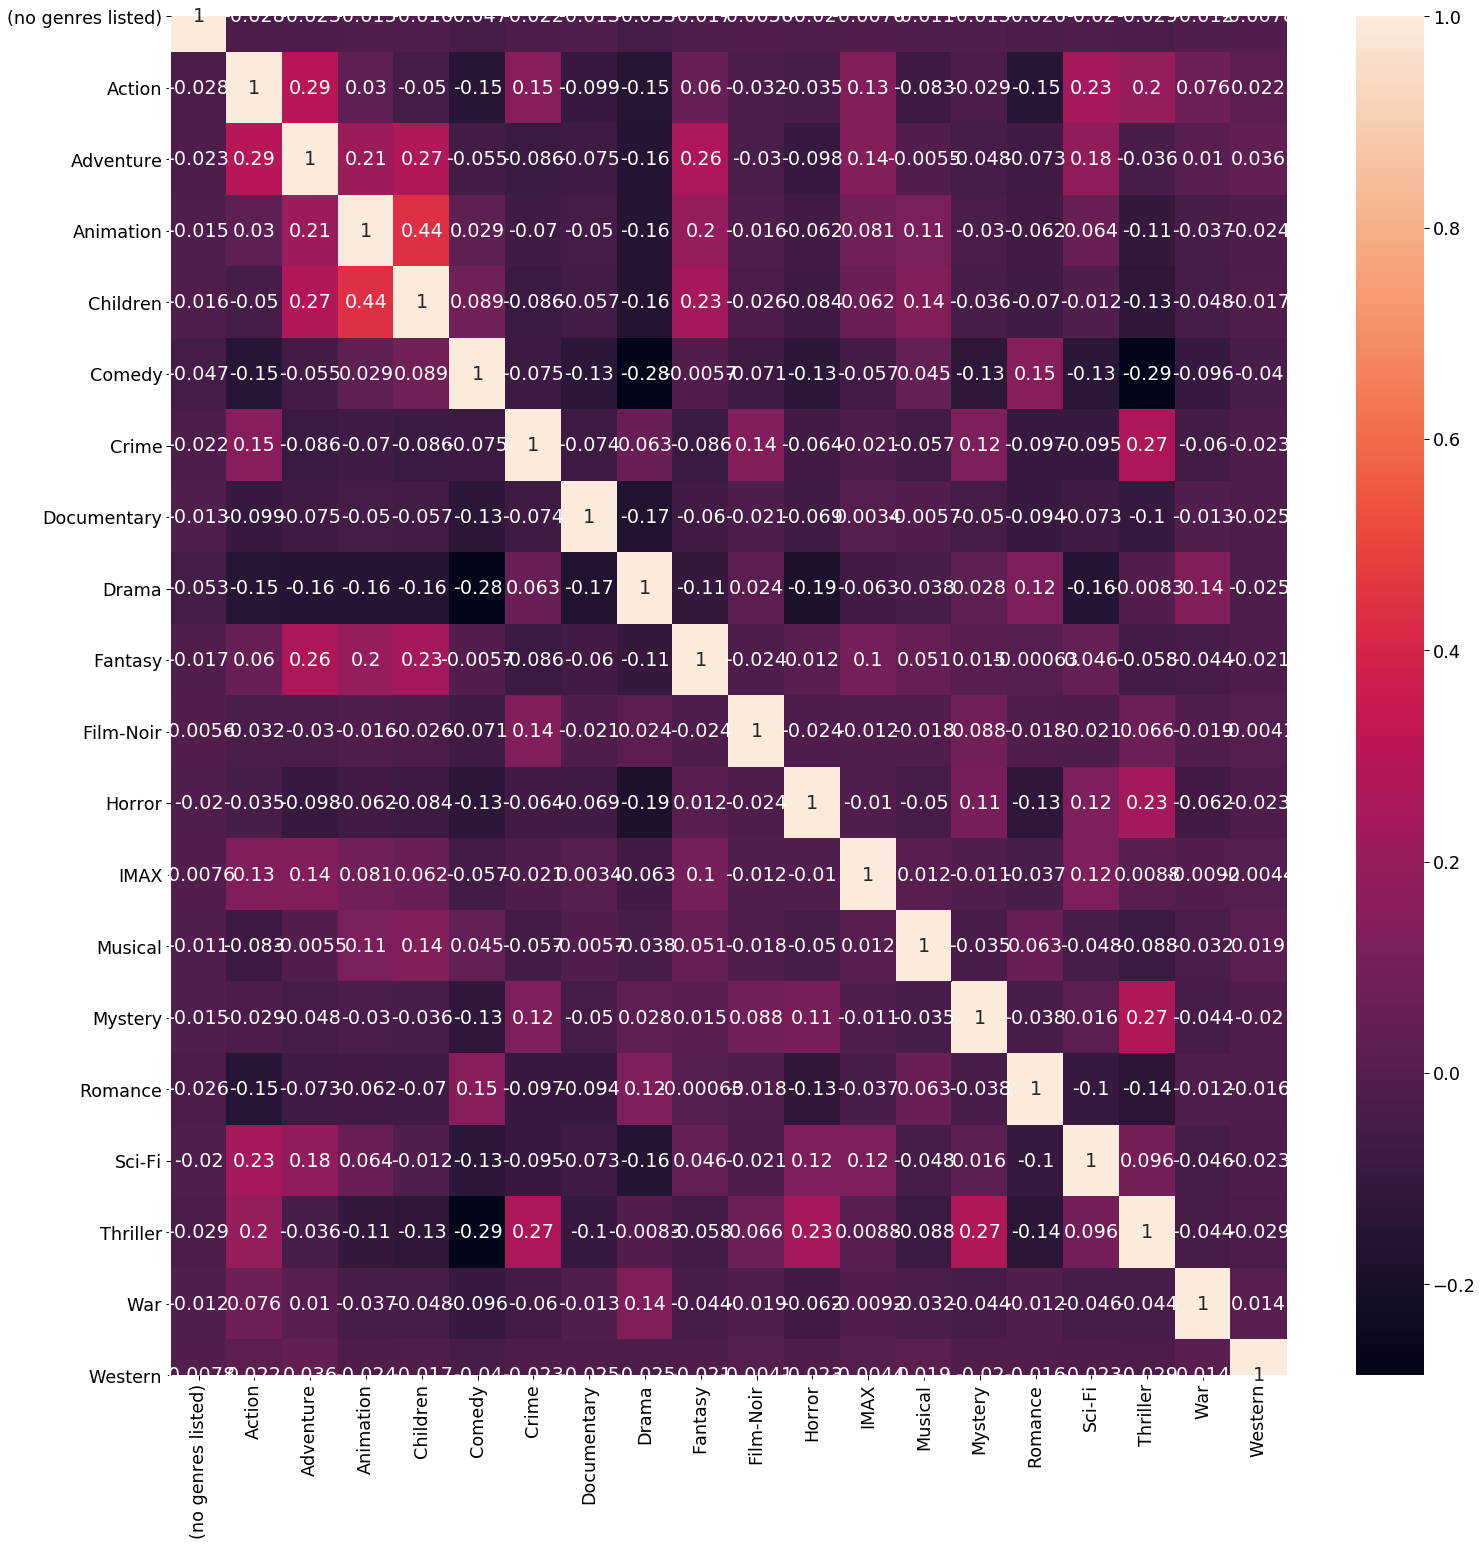

In [24]:
plt.figure(figsize=(25,25))
sns.heatmap(genres_dummies.corr(),annot=True)

## Ratings

In [25]:
ratings.shape

(100836, 4)

In [26]:
ratings.head(1)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703


In [27]:
ratings['userId'].nunique() #user수

610

In [28]:
ratings['movieId'].nunique() #movie수

9724

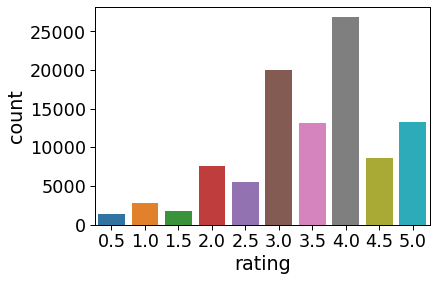

In [29]:
sns.countplot(data=ratings,x='rating')

In [30]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


## 사람들은 평균적으로 몇 개의 영화에 대해서 rating을 남겼는가?

In [31]:
ratings.pivot_table(index='userId',values='movieId',aggfunc='count').describe()

,movieId
count,610.000000
mean,165.304918
std,269.480584
min,20.000000
25%,35.000000
50%,70.500000
75%,168.000000
max,2698.000000


In [32]:
users=ratings.pivot_table(index='userId',values='movieId',aggfunc='count')

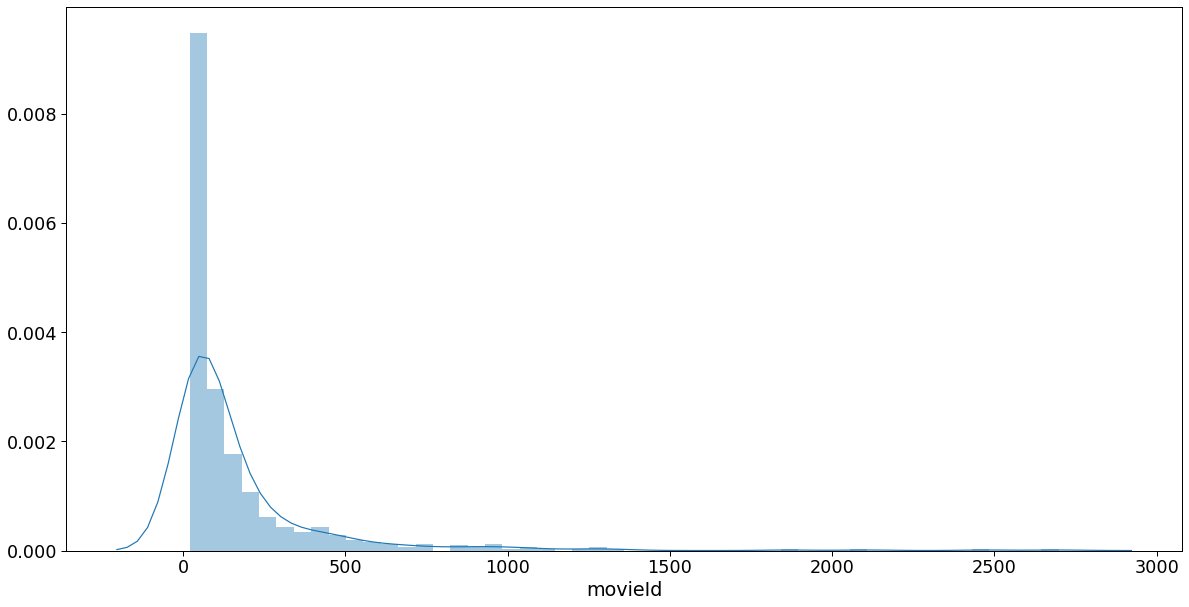

In [33]:
plt.figure(figsize=(20,10))
sns.distplot(users.movieId)

## 사람들이 많이 보는 영화는?

In [34]:
movie_count=ratings.groupby('movieId')['rating'].count()
movie_count

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: rating, Length: 9724, dtype: int64

In [35]:
top_movies=movie_count.sort_values(ascending=False).head(10)

In [36]:
pd.DataFrame(top_movies).reset_index().merge(movies,on='movieId',how='left')

,movieId,rating,title,genres,year,Western,Children,Horror,Adventure,Musical,...,IMAX,Romance,Animation,Sci-Fi,Documentary,Crime,Mystery,War,Action,(no genres listed)
0,356,329,Forrest Gump (1994),Comedy|Drama|Romance|War,1994,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,318,317,"Shawshank Redemption, The (1994)",Crime|Drama,1994,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,296,307,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,593,279,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1991,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2571,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
5,260,251,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1977,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
6,480,238,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,1993,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
7,110,237,Braveheart (1995),Action|Drama|War,1995,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
8,589,224,Terminator 2: Judgment Day (1991),Action|Sci-Fi,1991,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
9,527,220,Schindler's List (1993),Drama|War,1993,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## 겨울왕국 평점보기

In [37]:
ratings.loc[ratings['movieId'] == 106696,'rating'].mean() # 평점 3.6

3.6206896551724137

In [38]:
ratings.loc[ratings['movieId'] == 106696,'rating'].count() # 29명

29

In [39]:
frozen_ratings=pd.DataFrame(ratings.loc[ratings['movieId'] == 106696,'rating'])

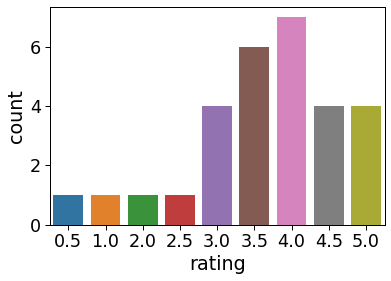

In [40]:
sns.countplot(data=frozen_ratings, x='rating')

## 내 데이터를 ratings table에 넣어보기

### Timestamp 컬럼 처리

In [41]:
from datetime import datetime

In [42]:
ratings['timestamp']

0          964982703
1          964981247
2          964982224
3          964983815
4          964982931
             ...    
100831    1493848402
100832    1493850091
100833    1494273047
100834    1493846352
100835    1493846415
Name: timestamp, Length: 100836, dtype: int64

In [43]:
ratings['timestamp'] = ratings['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

In [44]:
ratings['timestamp']

0        2000-07-31 03:45:03
1        2000-07-31 03:20:47
2        2000-07-31 03:37:04
3        2000-07-31 04:03:35
4        2000-07-31 03:48:51
                 ...        
100831   2017-05-04 06:53:22
100832   2017-05-04 07:21:31
100833   2017-05-09 04:50:47
100834   2017-05-04 06:19:12
100835   2017-05-04 06:20:15
Name: timestamp, Length: 100836, dtype: datetime64[ns]

### google sheet에 영화별 별점 추가

https://docs.google.com/spreadsheets/d/1_qxbRWY1ndnauQMvpwf3m46CuEWNUIU5H-tUQAugfms/edit?usp=sharing

In [45]:
my_ratings=pd.read_csv("../../data/movie/my-movie-ratings - hana.csv")
my_ratings

,userId,movieId,rating,timestamp
0,1111,141131,4.0,2020-09-20 15:32:10
1,1111,112852,5.0,2020-09-20 15:32:11
2,1111,122918,5.0,2020-09-20 15:32:12
3,1111,106696,4.0,2020-09-20 15:32:13
4,1111,106920,4.0,2020-09-20 15:32:14
5,1111,112556,3.0,2020-09-20 15:32:15
6,1111,163134,2.0,2020-09-20 15:32:16
7,1111,122922,4.5,2020-09-20 15:32:17
8,1111,174055,3.5,2020-09-20 15:32:18
9,1111,122904,5.0,2020-09-20 15:32:19


In [46]:
my_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     57 non-null     int64  
 1   movieId    57 non-null     int64  
 2   rating     57 non-null     float64
 3   timestamp  57 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.9+ KB


In [47]:
my_ratings['timestamp']=pd.to_datetime(my_ratings['timestamp'])

In [48]:
my_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   userId     57 non-null     int64         
 1   movieId    57 non-null     int64         
 2   rating     57 non-null     float64       
 3   timestamp  57 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.9 KB


In [49]:
my_ratings.shape

(57, 4)

### 내 영화 평점 분포 확인

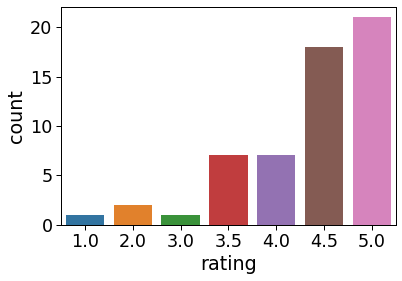

In [50]:
sns.countplot(data=my_ratings, x='rating')

## train test split

In [53]:
train, test = train_test_split(ratings, random_state=1, test_size=0.1)

In [54]:
print(train.shape, test.shape)

(90752, 4) (10084, 4)


## 가장 간단한 예측하기

In [59]:
prediction = [2.5] * len(test) # 전부 2.5 라고 예측했을 때 오차

In [60]:
mse = mean_squared_error(test['rating'],prediction)
rmse = np.sqrt(mse)
rmse

1.4552869051152493

In [61]:
prediction = [3.0] * len(test) # 전부 3.0 라고 예측했을 때 오차
mse = mean_squared_error(test['rating'],prediction)
rmse = np.sqrt(mse)
rmse

1.1649252222793436

In [62]:
prediction = [3.5] * len(test) # 전부 3.5 라고 예측했을 때 오차
mse = mean_squared_error(test['rating'],prediction)
rmse = np.sqrt(mse)
rmse

1.0470155542327133

In [63]:
prediction = [4.0] * len(test) # 전부 3.5 라고 예측했을 때 오차
mse = mean_squared_error(test['rating'],prediction)
rmse = np.sqrt(mse)
rmse

1.1556090896613325

3.5점으로 예측했을 때 1.04 > 4.0점으로 예측했을 때 1.15 으로 rmse가 늘어난다
전체적으로 3.5점에 많이 몰려있다고 볼 수 있다.

In [65]:
train['rating'].mean() #train의 평균 확인 3.5에 가까움

3.5005289139633287

In [66]:
prediction=[train['rating'].mean()] * len(test) # 평균으로 예측
mse = mean_squared_error(test['rating'],prediction)
rmse = np.sqrt(mse)
rmse

1.047010227399302

### 사용자 평균  평점 기반 예측 

userId 별 평균 평점을 기반으로 그 사용자에 대한 영화 평점 예측해보자.

이 방법은 User 별로 평점을 주는 특성이 있고, 주로 평균에 가깝게 줄거라고 생각하는 방법이다.

1) train dataset에서 userid 별 평균 평점 구해주기

In [124]:
u_train=train.groupby('userId')['rating'].mean().reset_index()
u_train.rename(columns={'rating':'predict'},inplace=True)
u_train

,userId,predict
0,1,4.348485
1,2,3.962963
2,3,2.486842
3,4,3.586735
4,5,3.634146
...,...,...
605,606,3.650786
606,607,3.789474
607,608,3.141611
608,609,3.277778


2) test dataset에서 userId 별 별점 평균 구해주기

In [122]:
u_test=test.groupby('userId')['rating'].mean().reset_index()
u_test

,userId,rating
0,1,4.470588
1,2,3.750000
2,3,0.500000
3,4,3.250000
4,5,3.666667
...,...,...
589,606,3.726804
590,607,3.750000
591,608,3.069767
592,609,3.000000


3) 두 테이블 merge 하고, predict 에 빠진 rating값이 test 테이블에 있었는지 확인

In [126]:
predict_by_users=u_test.merge(u_train,on='userId',how='left')
predict_by_users

,userId,rating,predict
0,1,4.470588,4.348485
1,2,3.750000,3.962963
2,3,0.500000,2.486842
3,4,3.250000,3.586735
4,5,3.666667,3.634146
...,...,...,...
589,606,3.726804,3.650786
590,607,3.750000,3.789474
591,608,3.069767,3.141611
592,609,3.000000,3.277778


In [127]:
# predict null value 확인
predict_by_users[predict_by_users['predict'].isnull()]

,userId,rating,predict


4) rmse 구하기

In [132]:
mse = mean_squared_error(predict_by_users['rating'],predict_by_users['predict'])
rmse = np.sqrt(mse)
rmse

0.46385401446510266

4) 예측 근거

In [133]:
ratings['rating'].std()

1.042529239060635

In [134]:
ratings.groupby('userId')['rating'].std().mean()

0.9271157884249589

## 영화 평점 기반 예측하기

movieId 평균 평점 기반으로 예측해보자

1) train dataset의 movieId 평균 구하기

In [138]:
m_train=train.groupby('movieId')['rating'].mean().reset_index()
m_train.rename(columns={'rating':'predict'},inplace=True)
m_train

,movieId,predict
0,1,3.950262
1,2,3.412371
2,3,3.260417
3,4,2.416667
4,5,3.022727
...,...,...
9347,193581,4.000000
9348,193583,3.500000
9349,193585,3.500000
9350,193587,3.500000


2) test dataset의 movieId 평균 평점 구하기

In [139]:
m_test=test.groupby('movieId')['rating'].mean().reset_index()
m_test

,movieId,rating
0,1,3.687500
1,2,3.576923
2,3,3.250000
3,4,2.000000
4,5,3.500000
...,...,...
3686,185585,3.000000
3687,187593,5.000000
3688,190207,1.500000
3689,190209,4.000000


3) 두 테이블 merge 해서, predict rating null 값 확인

In [143]:
merged=m_test.merge(m_train, on='movieId',how='left')
merged['predict'].isnull().sum() #null 값 372개 있음

372

In [145]:
# 4)  train의 전체 영화 평균으로 null 값 채워주자
train_mean=train['rating'].mean() 

In [146]:
merged.loc[merged['predict'].isnull(),'predict'] = train_mean

In [147]:
merged

,movieId,rating,predict
0,1,3.687500,3.950262
1,2,3.576923,3.412371
2,3,3.250000,3.260417
3,4,2.000000,2.416667
4,5,3.500000,3.022727
...,...,...,...
3686,185585,3.000000,2.500000
3687,187593,5.000000,3.772727
3688,190207,1.500000,3.500529
3689,190209,4.000000,3.500529


5) 예측모델 평가

In [148]:
mse = mean_squared_error(merged['rating'],merged['predict'])
rmse = np.sqrt(mse)
rmse

0.8880344653351234

4) 예측 근거

In [149]:
ratings.groupby('movieId')['rating'].std().mean()

0.8390298267427299